# 获取黄金的指标

In [1]:
import pandas as pd 

In [5]:
data_gold = pd.read_csv("gold_data.csv",encoding='GBK')
data_gold.head(3)

,Date,Close,Open,High,Low,Vol,Per
0,1979年12月27日,515.5,517.00,517.0,513.00,-,1.82%
1,1979年12月28日,517.8,516.00,517.8,510.40,-,0.45%
2,1979年12月31日,533.6,527.88,534.5,527.88,-,3.05%


In [18]:
def get_technical_indicators(dataset):
    # Create 7 and 21 Moving Average
    dataset['ma7'] = dataset['High'].rolling(window = 8).mean()
    dataset['ma21'] = dataset['High'].rolling(window = 21).mean()
    
    #Create MACD
    
    dataset['26ema'] = pd.DataFrame.ewm(dataset['High'] ,span =26).mean()
    dataset['12ema'] = pd.DataFrame.ewm(dataset['High'] ,span =12).mean()
    dataset['MACD'] =(dataset['12ema']- dataset['26ema'])
    
    #Greate Bollinger Bands
    dataset['20sd'] = dataset['High'].rolling(window =20).std()
    dataset['upper_band'] = dataset['ma21'] + (dataset['20sd']*2)
    dataset['lower_band'] = dataset['ma21'] - (dataset['20sd']*2)
    
    return dataset[21:]

data_gold_TI  = get_technical_indicators(data_gold)
data_gold_TI.head(100)

,Date,Close,Open,High,Low,Vol,Per,ma7,26ema,12ema,MACD,20sd,ma21,upper_band,lower_band
21,1980年1月28日,638.0,634.0,643.0,606.0,0.71K,0.63%,762.3750,701.834514,717.697692,15.863178,92.239288,679.347619,863.826194,494.869044
22,1980年1月29日,702.0,700.0,704.0,664.0,9.01K,10.03%,747.8750,702.027848,715.544171,13.516323,84.947600,688.214286,858.109486,518.319086
23,1980年1月30日,658.0,690.0,705.0,654.0,5.46K,-6.27%,729.7500,702.289227,713.892011,11.602784,80.207691,696.333333,856.748715,535.917951
24,1980年1月31日,681.5,660.0,687.0,638.0,3.01K,3.57%,706.2500,700.963045,709.690263,8.727218,78.965199,701.571429,859.501826,543.641031
25,1980年2月1日,683.3,677.0,693.0,666.0,1.61K,0.26%,698.1250,700.280972,707.088731,6.807758,76.555364,704.095238,857.205965,550.984511
26,1980年2月4日,660.0,670.0,677.0,659.0,1.15K,-3.41%,690.2500,698.309676,702.408241,4.098565,75.000544,706.761905,856.762992,556.760817
27,1980年2月5日,687.0,670.0,698.0,667.0,8.95K,4.09%,687.5000,698.283729,701.723682,3.439953,71.954737,709.761905,853.671379,565.852430
28,1980年2月6日,713.0,705.0,721.0,705.0,10.09K,3.78%,691.0000,700.168728,704.712797,4.544069,67.890081,714.619048,850.399210,578.838885
29,1980年2月7日,689.5,705.0,708.0,685.0,1.65K,-3.30%,699.1250,700.812832,705.221911,4.409079,62.109411,719.142857,843.361679,594.924035
30,1980年2月8日,694.5,691.0,700.0,688.5,1.03K,0.73%,698.6250,700.746520,704.413987,3.667467,59.966197,723.809524,843.741917,603.877131


In [24]:
def plot_technical_indicators(dataset, last_days):
    plt.figure(figsize=(16, 10), dpi=100)
    shape_0 = dataset.shape[0]
    xmacd_ = shape_0-last_days
    
    dataset = dataset.iloc[-last_days:, :]
    x_ = range(3, dataset.shape[0])
    x_ =list(dataset.index)
    
    # Plot first subplot
    plt.subplot(2, 1, 1)
    plt.plot(dataset['ma7'],label='MA 7', color='g',linestyle='--')
    plt.plot(dataset['High'],label='Closing Price', color='b')
    plt.plot(dataset['ma21'],label='MA 21', color='r',linestyle='--')
    plt.plot(dataset['upper_band'],label='Upper Band', color='c')
    plt.plot(dataset['lower_band'],label='Lower Band', color='c')
    plt.fill_between(x_, dataset['lower_band'], dataset['upper_band'], alpha=0.35)
    plt.title('Technical indicators for Goldman Sachs - last {} days.'.format(last_days))
    plt.ylabel('USD')
    plt.legend()

    # Plot second subplot
    plt.subplot(2, 1, 2)
    plt.title('MACD')
    plt.plot(dataset['MACD'],label='MACD', linestyle='-.')
    plt.hlines(15, xmacd_, shape_0, colors='g', linestyles='--')
    plt.hlines(-15, xmacd_, shape_0, colors='g', linestyles='--')
    

    plt.legend()
    plt.show()

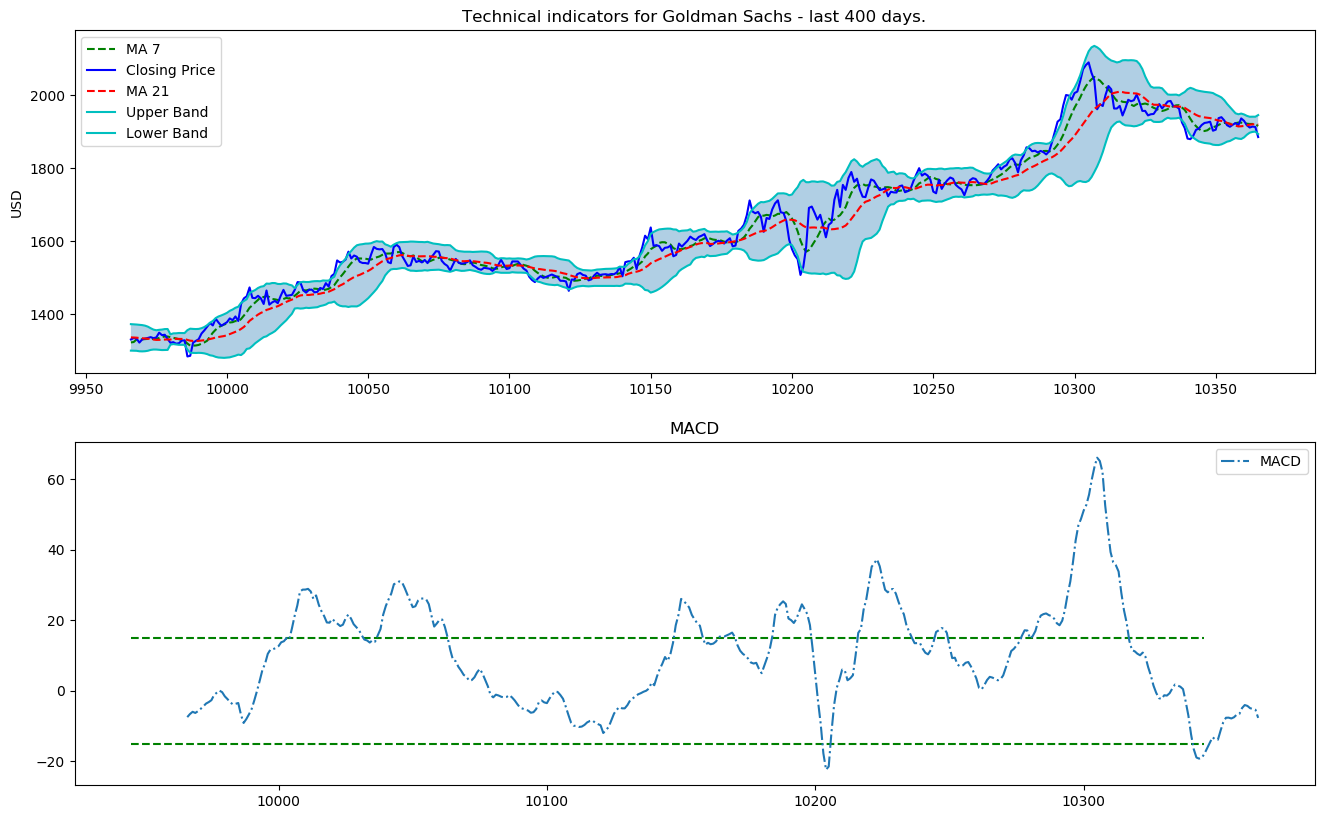

In [25]:
import matplotlib.pyplot as plt
plot_technical_indicators(data_gold_TI,400)